Testing CNN model

In [13]:
import tensorflow as tf
import pandas as pd

from keras import Sequential, layers, callbacks, losses, utils
from keras.preprocessing import image_dataset_from_directory


In [14]:
%%capture
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

Preprocess data and create the training and validation split 80% / 20%.

In [ ]:
img_height = 180
img_width = 180

batch_size = 32

seed = 123

data_dir = "../data/tests/flower_photos"

#input_shape = [img_height,img_width, 3]

ds_train = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    seed=seed,
    subset="training",
    image_size=(img_height,img_width),
    batch_size=batch_size
    )
ds_valid= image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    seed=seed,
    subset="validation",
    image_size=(img_height,img_width),
    batch_size=batch_size
    )

class_names = ds_train.class_names # type: ignore
num_classes = 5
#print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [16]:
%%capture
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [17]:
%%capture
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [18]:
AUTOTUNE = tf.data.AUTOTUNE

ds_train = ds_train.cache().prefetch(buffer_size=AUTOTUNE)
ds_valid = ds_valid.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:

layers = [
    # Body
    layers.Rescaling(1./255),
    
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(),
    #layers.Dropout(rate=0.3),

    layers.Conv2D(filters=128, kernel_size=3,activation='relu'),
    layers.MaxPooling2D(),
    #layers.Dropout(rate=0.3),
    
    # Classifier head
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    #layers.Dropout(rate=0.2),
    layers.Dense(num_classes),
]

asdasd

In [ ]:
model = Sequential(layers=layers)

early_stopping = callbacks.EarlyStopping(patience=5,
                                      min_delta=0.001,restore_best_weights=True)
model.compile(
    optimizer='adam',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Train the model

In [21]:

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    callbacks=[early_stopping],
    epochs=40,
)

Epoch 1/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 229ms/step - accuracy: 0.3849 - loss: 1.3823 - val_accuracy: 0.4782 - val_loss: 1.2535
Epoch 2/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 203ms/step - accuracy: 0.5463 - loss: 1.0892 - val_accuracy: 0.5599 - val_loss: 1.1654
Epoch 3/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - accuracy: 0.6339 - loss: 0.9430 - val_accuracy: 0.6431 - val_loss: 0.9778
Epoch 4/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - accuracy: 0.6962 - loss: 0.8046 - val_accuracy: 0.6512 - val_loss: 1.0110
Epoch 5/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.7398 - loss: 0.6886 - val_accuracy: 0.6703 - val_loss: 0.9609
Epoch 6/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 203ms/step - accuracy: 0.7810 - loss: 0.5792 - val_accuracy: 0.6444 - val_loss: 1.1069
Epoch 7/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.8300 - loss: 0.4494 - val_accuracy: 0.6458 - val_loss: 1.1334
Epoch 8/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 203ms/step - accuracy: 0.8822 - loss: 0.3360 - val_accu

<Axes: >

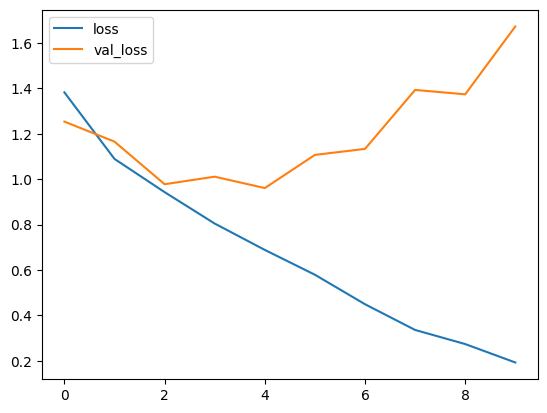

In [22]:

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()